# Project 2 - KEGG pathways overlap, Team 1

Ciao-Sin Chelsea Chen <br>
Amelia Lauth <br>
Noah Helton <br>
Faith Carranza

# Reflections

## Ciao-Sin Chelsea Chen

What was your biggest challenge in this project? (regarding writing code and not only) <br>
- My biggest challenge in this project was to find out how to make the dataframe of links between gene and pathway into a dictionary. When I was computing the pathway count of each gene, instead of just directly getting the counts, I chose to make a dictionary with genes as keys and pathways as values to retain the information of pathway IDs. Since one gene can have multiple pathways, I supposed a dictionary is an appropriate format, but none of formats of to_dict method can handle multiple values for one key. It took me a while to figure out how to use set_index, groupby, and apply methods together.

What did you learn while working on this project? (regarding writing code and not only) <br>
- While working on this project, I learned how to collaborate with others on GitHub using clones, forks, pull requests. This is the first time I realized how the comments and tags features can reduce the burden of communicating back and forth and make the information sharing much more convenient. I also learned how to how to use dataframe methods or comprehensions to make the code more efficient without iterating through rows or columns of dataframes because it can be a lot more time consuming when working on a bigger data.

If you had more time on the project what other question(s) would you like to answer? (at least one question is required) <br>
 - If I had more time on the project, I would look for pathways that contains the highest numbers of genes, which are likely to be an overview of multiple pathways, such as biosynthesis of amino acids (hsa01230). These can help with visualizing the difference of metabolic trends when there are different groups or time points in a study.

## Faith Carranza

What was your biggest challenge in this project? <br>
<br>
- My biggest challenge in this project was learning how to manage a GitHub repository and how to figure out how everyones code fit together for a contiguous analysis. Everyone write code slightly different, so trying to make sure data types and objects were used consistently between each others code to make sure the coding environment was organized and flowed well together was a challenge. It was also challenging to keep track of the repository and make sure the working tree was always clear and the repository was organized and up to date. 


What did you learn while working on this project?  <br>
<br>
- I learned how to work much more comfortably with pandas data frames. I also learned how to manage a github repositiory. I also learned how to use venn diagram packages to make venn diagrams. In addition, I learned how to work on a single script with multiple people. 


<br>
<br>


If you had more time on the project what other question(s) would you like to answer? 
- I would do something similar with Gene Ontology (GO) terms. I use gene ontology frequently in research, so it would be helpful to know how much the top GO hits for a given gene list overlap to see if they should be considered together or as two seperate GO terms to consider. It could also be itneresting to make some venn diagrams for pathways with a lot of genes overlapping to see if any genes that are not in common between the two can be identified. These genes can then be used to distinguish between which GO term is more specific to a gene list. Maybe there is a way to weight unique genes between two pathways with a lot of overlap to identify GO terms more specificially. <br>
- Additionally, when we sorted the data frame in step 3 to get the pathways with the most number of overlapping genes, I noticed that the top pathways were all involved in neurodegenerative disease. My research is focused on pathogenesis of neurodegenerative disease, so I think it would be interesting to see which genes are shared between different neurodegenerative diseases (Alzheimer disease, Amyotrophic lateral sclerosis, Huntington disease, Parkinson's Disease). This could be useful in identifying genes that are central in all these diseases to try to find a common target. This has been a major goal in neurodegenerative disease research for a long time, so seeing which genes are central in all of these diseases would provide some hints into mechanistic overlap. 


## Amelia Lauth

What was your biggest challenge in this project? <br>
<br>
- The biggest challenge in this project was learning how to format Venn diagrams using a python package I was not familiar with. I ran into the problem of having more than 3 sets of gene pathways to put into the Venn diagram. So, I got experience searching for different python packages that could graph up to six or eight sets at once. I then had to play around with test Venn diagrams to learn what inputs they took. I ended up creating three separate Venn diagrams to show that the genes with the same number of pathways had no differences between pathways. This allowed us to choose one gene from each of the three pathway groups and place those three genes in the final Venn diagram. Pushing my code to the shared GitHub repository was also challenging since it kept denying me permission. I realized I had to fork the repository onto my own GitHub account and then successfully push it through a pull-request to the team’s repository. 


What did you learn while working on this project?  <br>
<br>
- This was my first team coding project, so I learned how to communicate well with team members, asking for help when needed, discussing code, debugging code, learning how to read other people’s coding style, testing the final scripts, and forking and pushing code to the shared GitHub repository. I also got the experience of searching for python packages and reading their GitHub descriptions/documentations. 
<br>


If you had more time on the project what other question(s) would you like to answer? 
- I am curious as to why we had more than one gene with the same number of pathways. Furthermore, when I tested with Venn diagrams to see if there were differences between/among those pathways, they were the same. Why did more than one gene have the exact same number of the exact same pathways? How many more genes in this dictionary we created have the same number of pathways? Do those genes have the same exact pathways too? What is the rate of this pathway overlapping amongst all the genes? If the pathways are overlapping, what other aspects/characteristics of these genes are similar? 


## Noah Helton 

What was your biggest challenge in this project? <br>
<br>
- The biggest challenge of this project was trying to figure out the best data structures to use answer solve the problem. My part of the project was finding all the overlapping genes between the pathways, so trying to use lists and dictionaries, as well as pandas data frames all cohesively and efficiently was challenging. Also trying to get github and collaborate with others on a coding project was new to me, so that was also challenging.

What did you learn while working on this project?  <br>
<br>
- I learned how to better manipulate data structures, specifically on skills involved in creating dictionaries and accessing them. Also, working with lists and understanding indices better to help solve the problem. 
<br>

If you had more time on the project what other question(s) would you like to answer? 
- I would like to extend this project beyond KEGG. There are many databases that have genetic data and metabolic pathways, so seeing more overlaps could be interesting. I wonder if given more data you can start to make predictions on pathway overlaps when a new gene or pathway is identified.


# Overall the goal of this project is to quantify and visualize the overlap of genes in various KEGG pathways



## 1. Map/merge the information by PATHWAY_ID and GENE_ID.

Started by loading in all data sets into pandas data frames. <br>
There are 3 data sets: <br>
 1. The pathway ID and the pathway name (pathway_ID_list)
 2. The gene ID and gene name(s) (geneID_geneName)
 3. The gene by ID associated with pathways by ID (pathway_to_gene)

In [1]:
import numpy as np 
import pandas as pd

In [2]:
#pandas data frame containing the pathway ID in the first column, and the 
#name of the pathway in the second column 
pathway_ID_list = pd.read_csv('http://rest.kegg.jp/list/pathway/hsa', delimiter = "\t", header = None)
pathway_ID_list.columns = ["pathway_ID", "pathway_name"]

In [3]:
#pandas data frame containing the gene ID in the first column, and the 
#name(s) of the gene in the second column 
geneID_geneName = pd.read_csv("http://rest.kegg.jp/list/hsa", sep = "\t", header = None)
geneID_geneName.columns = ["gene_ID", "gene_name"]

In [5]:
#pandas data frame containing the gene ID in the first column, and the 
#pathway ID in the second column 
pathway_to_gene = pd.read_csv("http://rest.kegg.jp/link/pathway/hsa", sep = "\t", header = None)
pathway_to_gene.columns = ["gene_ID", "pathway_ID"]

I want to compile the information from the three data frames into one, I want to keep all the information, so I want to find the largest DF and start merging from there 

In [6]:
pathway_ID_list.shape #352 X 2 
pathway_to_gene.shape #35369 X 2 
geneID_geneName.shape #22199 X 2 
#pathway_to_gene is largest dataframe. Will merge with pathway_ID_lsit first 

(22231, 2)

In [7]:
#Firts I am going to merge the pathway_ID list to the pathway_to_gene data frame by pathway ID 
#I left joined with pathway_to_gene as left because it is bigger 
pathway_gene = pathway_ID_list.merge(pathway_to_gene, on  = "pathway_ID", how = "left")

In [8]:
#I want to make sure there are no gross errors when merging leaving a bunch of NAs 
pathway_gene.isnull().sum() #there are no na values 


pathway_gene.shape #is the right shape too, merge seems to have worked 



(35380, 3)

In [10]:
pathway_gene_name = pathway_gene.merge(geneID_geneName, on = "gene_ID", how = "left")

pathway_gene_name.shape #is the right shape 

pathway_gene_name.isnull().sum() #there are no NA values 

pathway_gene_name  #We now have a data frame that is all of the information about the gene ID, its name, and its assocaited pathways. 

,pathway_ID,pathway_name,gene_ID,gene_name
0,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:10327,"AKR1A1, ALDR1, ALR, ARM, DD3, HEL-S-6; aldo-ke..."
1,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:124,"ADH1A, ADH1; alcohol dehydrogenase 1A (class I..."
2,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:125,"ADH1B, ADH2, HEL-S-117; alcohol dehydrogenase ..."
3,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:126,"ADH1C, ADH3; alcohol dehydrogenase 1C (class I..."
4,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,hsa:127,"ADH4, ADH-2, HEL-S-4; alcohol dehydrogenase 4 ..."
...,...,...,...,...
35375,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,hsa:91860,"CALML4, NY-BR-20; calmodulin like 4"
35376,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,hsa:92,"ACVR2A, ACTRII, ACVR2; activin A receptor type 2A"
35377,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,hsa:93,"ACVR2B, ACTRIIB, ActR-IIB, HTX4; activin A rec..."
35378,path:hsa05418,Fluid shear stress and atherosclerosis - Homo ...,hsa:9446,"GSTO1, GSTO_1-1, GSTTLp28, HEL-S-21, P28, SPG-..."


In [9]:
#Run this block to save to a csv file 
#pathway_gene_name.to_csv("pathway_gene_info.csv", index=False) 


## 2. Compute the number of overlapping genes between every 2 pathways.

### Function 1: Creates a dictionary with each pathway ID as the key and the gene names in that pathway as the values. 

In [11]:



def get_genes_for_pathways(pathways_df, genes_df):
    """
    Create a dictionary with each pathway as the key and the list of genes within that pathway are the values 
    
    input: A dataframe with pathway_IDs as the first column (not INDEX), 
           a dataframe with gene_IDs with gene_ID as the first column (not index),and gene description as the second column 
           
    output: a dictionary with each pathway as the key and the list of genes within that pathway are the values 
    """
    pathways_genes_dictionary = {}    
    for i in range(0, len(pathways_df.iloc[:,0])):
        pathways_genes_dictionary[pathways_df.iloc[:,0][i]] = []
            
    for i in range(0, len(genes_df.iloc[:,0])):
        pathways_genes_dictionary[genes_df.iloc[:,0][i]].append(genes_df.iloc[:,3][i])
                                  
    return pathways_genes_dictionary


#Running the kegg pathway IDs and gene IDs through the function to create the dictionary 
pathways_genes_dictionary = get_genes_for_pathways(pathway_ID_list, pathway_gene_name)


### Function 2: Creates a list of all possible pathway pairs 

In [17]:

def get_pathway_pairs(pathways):
    """
    Create list of all possible pairs of pathways 
    
    input: A dataframe with a column called "pathway_ID" that contains all pathway_IDs that will be used for combinations 
    
    output: a list containing pairs of pathways 
        No pairs containing the same pathways ('pathway1', 'pathway1')
        The pairs will not be repeated backwards (('pathway1', 'pathway2'), ('pathway2', 'pathway1))
    """
    count = 0
    index = 1
    pathway_pairs = []
    for i1 in pathways['pathway_ID']:
        for i2 in pathways['pathway_ID'][index:]:
            pathway_pairs.append((i1, i2))
        index += 1

    return pathway_pairs


pathway_pairs = get_pathway_pairs(pathway_ID_list) # returns all the combo pairs for the KEGG data base 

print(f'There are {len(pathway_pairs)} unique pathway combinations')

There are 59340 unique pathway combinations


### Function 3 & 4: creates a dictionary containing the unique pathway combination as the key and the genes overlapping in those pathways as the values

In [18]:
#Function 3 
def intersection(lst1, lst2): #returns the intersection of two sets 
    return list(set(lst1) & set(lst2))

#function 4 
def get_overlapping_genes(pathway_pairs, pathway_gene_dictionary): #takes the pathway combo pairs and the pathway_gene_dictionary from functions 1 and 2 as inputs
    
    '''
    Creates a dictionary 'pairs_dictionary' where each pathway pair is a key, and the the genes in common between both pathways are the values
    
    '''
    pairs_dictionary ={}
    for i in range(0, len(pathway_pairs)):
        genes_list_pathway1 = pathway_gene_dictionary[pathway_pairs[i][0]]
        genes_list_pathway2 = pathway_gene_dictionary[pathway_pairs[i][1]]
        pairs_dictionary[pathway_pairs[i]] = intersection(genes_list_pathway1, genes_list_pathway2)
    return pairs_dictionary
#Running the kegg functions through function 4 to get list of overlapping genes 

pair_dictionary = get_overlapping_genes(pathway_pairs,pathways_genes_dictionary)

### Function 5, making the KEGG_crosstalk.csv

 

3. Save the result to a file KEGG_crosstalk.csv with the following columns: PATHWAY_ID1, PATHWAY_NAME1, PATHWAY_ID2, PATHWAY_NAME2. Order the results descending by the number of overlapping genes where PATHWAY_ID1 is different than PATHWAY_ID2.

 



 

In [20]:
def create_pandas_dataframe(pair_dictionary):
    #Create empty dataframe
    final_df = pd.DataFrame()
    
    '''
    returns a data frame containing the pathway pairs, the pathway IDs, the pathway names, the number of genes shared in both pathways, and the intersecting genes
    
    input: pair dictionary returned from function 4 
    output: a data frame that does need to be cleaned furthur to get pathway names 
    
    '''
    
    ids_1 = []
    ids_2 = []
    names_1 = []
    names_2 = []
    number_genes = []
    overlap_list = []
    
    for key in pair_dictionary:
        ids_1.append(key[0])
        ids_2.append(key[1])
        number_genes.append(len(pair_dictionary[key]))
        overlap_list.append(pair_dictionary[key])
        
    final_df['PATHWAY_ID1'] = ids_1
    final_df['PATHWAY_ID2'] = ids_2
    final_df['NUMBER_OF_OVERLAPPING_GENES'] = number_genes
    final_df['LIST_OF_OVERLAPPING_GENES'] = overlap_list
    
    return final_df


### Cleaning up the data frame 

In [21]:
pair_dict_DF = create_pandas_dataframe(pair_dictionary) #Running the pairs dictionary to the create data frame function

In [22]:
pair_dict_DF

,PATHWAY_ID1,PATHWAY_ID2,NUMBER_OF_OVERLAPPING_GENES,LIST_OF_OVERLAPPING_GENES
0,path:hsa00010,path:hsa00020,7,"[PCK1, PCKDC, PEPCK-C, PEPCK1, PEPCKC; phospho..."
1,path:hsa00010,path:hsa00030,11,"[PFKP, ATP-PFK, PFK-C, PFK-P, PFKF; phosphofru..."
2,path:hsa00010,path:hsa00040,1,"[AKR1A1, ALDR1, ALR, ARM, DD3, HEL-S-6; aldo-k..."
3,path:hsa00010,path:hsa00051,13,"[TPI1, HEL-S-49, TIM, TPI, TPID; triosephospha..."
4,path:hsa00010,path:hsa00052,14,"[G6PC1, G6PC, G6PT, G6Pase, GSD1, GSD1a; gluco..."
...,...,...,...,...
59335,path:hsa05415,path:hsa05417,38,"[CD36, BDPLT10, CHDS7, FAT, GP3B, GP4, GPIV, P..."
59336,path:hsa05415,path:hsa05418,27,"[MAPK13, MAPK_13, MAPK-13, PRKM13, SAPK4, p38d..."
59337,path:hsa05416,path:hsa05417,9,"[ICAM1, BB2, CD54, P3.58; intercellular adhesi..."
59338,path:hsa05416,path:hsa05418,7,"[ICAM1, BB2, CD54, P3.58; intercellular adhesi..."


In [25]:
#merging the pathway names into the final data frame using a left merge. Adds new columm, pathway_name_x that is the pathway name for pathway_ID1
pathway1_names = pair_dict_DF.merge(pathway_ID_list ,left_on  = "PATHWAY_ID1", right_on = "pathway_ID" ,how = "left")
#merging the pathway names into the final data frame using a left merge. Adds new columm, pathway_name_y that is the pathway name for pathway_ID2
pathway_1_2_names = pathway1_names.merge(pathway_ID_list ,left_on  = "PATHWAY_ID2", right_on = "pathway_ID" ,how = "left")

pathway_1_2_names.head()

,PATHWAY_ID1,PATHWAY_ID2,NUMBER_OF_OVERLAPPING_GENES,LIST_OF_OVERLAPPING_GENES,pathway_ID_x,pathway_name_x,pathway_ID_y,pathway_name_y
0,path:hsa00010,path:hsa00020,7,"[PCK1, PCKDC, PEPCK-C, PEPCK1, PEPCKC; phospho...",path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human)
1,path:hsa00010,path:hsa00030,11,"[PFKP, ATP-PFK, PFK-C, PFK-P, PFKF; phosphofru...",path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00030,Pentose phosphate pathway - Homo sapiens (human)
2,path:hsa00010,path:hsa00040,1,"[AKR1A1, ALDR1, ALR, ARM, DD3, HEL-S-6; aldo-k...",path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00040,Pentose and glucuronate interconversions - Hom...
3,path:hsa00010,path:hsa00051,13,"[TPI1, HEL-S-49, TIM, TPI, TPID; triosephospha...",path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00051,Fructose and mannose metabolism - Homo sapiens...
4,path:hsa00010,path:hsa00052,14,"[G6PC1, G6PC, G6PT, G6Pase, GSD1, GSD1a; gluco...",path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00052,Galactose metabolism - Homo sapiens (human)


In [27]:
#making the final csv file 

#removing just the columns I want for furthur analysis, changing the order of the columns 
cols = ["PATHWAY_ID1", "pathway_name_x","PATHWAY_ID2", "pathway_name_y", "NUMBER_OF_OVERLAPPING_GENES", "LIST_OF_OVERLAPPING_GENES"]
KEGG_crosstalk =pathway_1_2_names[cols]

#renaming the columns 
KEGG_crosstalk.columns = ['PATHWAY_ID1', 'PATHWAY_NAME1', 'PATHWAY_ID2', 'PATHWAY_NAME2','NUMBER_OF_OVERLAPPING_GENES', 'LIST_OF_OVERLAPPING_GENES']
KEGG_crosstalk.head()


,PATHWAY_ID1,PATHWAY_NAME1,PATHWAY_ID2,PATHWAY_NAME2,NUMBER_OF_OVERLAPPING_GENES,LIST_OF_OVERLAPPING_GENES
0,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human),7,"[PCK1, PCKDC, PEPCK-C, PEPCK1, PEPCKC; phospho..."
1,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00030,Pentose phosphate pathway - Homo sapiens (human),11,"[PFKP, ATP-PFK, PFK-C, PFK-P, PFKF; phosphofru..."
2,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00040,Pentose and glucuronate interconversions - Hom...,1,"[AKR1A1, ALDR1, ALR, ARM, DD3, HEL-S-6; aldo-k..."
3,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00051,Fructose and mannose metabolism - Homo sapiens...,13,"[TPI1, HEL-S-49, TIM, TPI, TPID; triosephospha..."
4,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,path:hsa00052,Galactose metabolism - Homo sapiens (human),14,"[G6PC1, G6PC, G6PT, G6Pase, GSD1, GSD1a; gluco..."


In [35]:
#ordering by descending order 

KEGG_crosstalk.sort_values(by = ['NUMBER_OF_OVERLAPPING_GENES'], ascending=False)


,PATHWAY_ID1,PATHWAY_NAME1,PATHWAY_ID2,PATHWAY_NAME2,NUMBER_OF_OVERLAPPING_GENES,LIST_OF_OVERLAPPING_GENES
55859,path:hsa05010,Alzheimer disease - Homo sapiens (human),path:hsa05022,Pathways of neurodegeneration - multiple disea...,333,"[FZD10, CD350, FZ-10, Fz10, FzE7, hFz10; frizz..."
56022,path:hsa05014,Amyotrophic lateral sclerosis - Homo sapiens (...,path:hsa05022,Pathways of neurodegeneration - multiple disea...,294,"[ATP5PB, ATP5F1, PIG47; ATP synthase periphera..."
56102,path:hsa05016,Huntington disease - Homo sapiens (human),path:hsa05022,Pathways of neurodegeneration - multiple disea...,251,"[ATP5PB, ATP5F1, PIG47; ATP synthase periphera..."
55941,path:hsa05012,Parkinson disease - Homo sapiens (human),path:hsa05022,Pathways of neurodegeneration - multiple disea...,228,"[ATP5PB, ATP5F1, PIG47; ATP synthase periphera..."
56019,path:hsa05014,Amyotrophic lateral sclerosis - Homo sapiens (...,path:hsa05016,Huntington disease - Homo sapiens (human),224,"[ATP5PB, ATP5F1, PIG47; ATP synthase periphera..."
...,...,...,...,...,...,...
12355,path:hsa00500,Starch and sucrose metabolism - Homo sapiens (...,path:hsa05320,Autoimmune thyroid disease - Homo sapiens (human),0,[]
31509,path:hsa03320,PPAR signaling pathway - Homo sapiens (human),path:hsa04940,Type I diabetes mellitus - Homo sapiens (human),0,[]
31510,path:hsa03320,PPAR signaling pathway - Homo sapiens (human),path:hsa04950,Maturity onset diabetes of the young - Homo sa...,0,[]
31512,path:hsa03320,PPAR signaling pathway - Homo sapiens (human),path:hsa04961,Endocrine and other factor-regulated calcium r...,0,[]


In [36]:
#run to create a csv file of the data frame
KEGG_crosstalk.to_csv("KEGG_crosstalk.csv", index=False)


#run to create a csv file of the data frame sorted in descrending order by the number of overlapping genes 
KEGG_crosstalk.sort_values(by = ['NUMBER_OF_OVERLAPPING_GENES'], ascending=False).to_csv("KEGG_crosstalk.csv", index=False)

## 4. Compute a rank of the genes based on how many pathways they appear on and save it to a file.

### Function 1. Commputing the map and the set of pathways the gene is in 


In [38]:
def get_map_gene_pathways(links_gene_pathway): 
    """
    Compute the map of each gene and the set of pathways the gene is in.

    Parameters:
    links_gene_pathway (pandas.DataFrame): The dataframe of links between genes and pathways.

    Returns:
    map_gene_pathways (dict): The map of each gene and the set of pathways the gene is in.

    """
    map_gene_pathways_info = links_gene_pathway.set_index("gene_ID").groupby(level = 0).apply(lambda pathways: list(pathways.pathway_ID))
    map_gene_pathways = dict(map_gene_pathways_info)
    return map_gene_pathways

def count_pathway(gene_ID, map_gene_pathways):
    """
    Count the number of pathways the given gene is in.

    Parameters:
    gene_ID (str): The KEGG ID of the gene.
    map_gene_pathways (dict): The map of each gene and the set of pathways the gene is in, which is generated by get_map_gene_pathways function.

    Returns:
    pathway_count (int): The number of pathways the given gene is in.

    """
    pathways = map_gene_pathways[gene_ID]
    pathway_count = len(pathways)
    return pathway_count

def get_gene_name(gene_ID, gene_name_info):
    """
    get the name of the given gene.

    Parameters:
    gene_ID (str): The KEGG ID of the gene.
    gene_name_info (pandas.DataFrame): The dataframe of KEGG ID and names of all genes.

    Returns:
    gene_name (str): The name of the given gene.

    """
    gene_name = gene_name_info.gene_name[gene_name_info.gene_ID == gene_ID]
    return gene_name

def get_pathway_name(pathway_ID, pathway_name_info): 
    """
    get the name of the given pathway.

    Parameters:
    pathway_ID (str): The KEGG ID of the pathway.
    pathway_name_info (pandas.DataFrame): The dataframe of KEGG ID and names of all pathways.

    Returns:
    pathway_name (str): The name of the given pathway.

    """
    pathway_name = pathway_name_info.pathway_name[pathway_name_info.pathway_ID == pathway_ID]
    return pathway_name

### Saving it to a file "Gene_rank.csv"

In [39]:
# create a dictionary with genes as keys and pathways as values using information of links between genes and pathways
map_gene_pathways = get_map_gene_pathways(pathway_to_gene)

# count the number of pathways of each gene
pathway_counts = {"gene_ID": map_gene_pathways.keys(), 
                  "pathway_count": [count_pathway(gene_ID, map_gene_pathways) for gene_ID in map_gene_pathways.keys()], 
                  "pathway_IDs": map_gene_pathways.values()}
pathway_counts = pd.DataFrame(pathway_counts).sort_values("pathway_count", ascending = False)
pathway_counts.iloc[:10, ]


,gene_ID,pathway_count,pathway_IDs
5214,hsa:5594,117,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
5215,hsa:5595,117,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
4745,hsa:5290,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4746,hsa:5291,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4748,hsa:5293,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4751,hsa:5296,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
7302,hsa:8503,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
4750,hsa:5295,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
3,hsa:10000,100,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
1644,hsa:207,100,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."


## 5. Retrieve a set of the pathways the top 3 genes appear on.

In [40]:
genes_want = pathway_counts.iloc[:8, :]
genes_want

,gene_ID,pathway_count,pathway_IDs
5214,hsa:5594,117,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
5215,hsa:5595,117,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
4745,hsa:5290,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4746,hsa:5291,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4748,hsa:5293,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4751,hsa:5296,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
7302,hsa:8503,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
4750,hsa:5295,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."


## 6. Compute and display a Venn diagram for number of overlapping pathways for the top 3 genes.

In [41]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

In [42]:
#creating a dictionary I can call by gene name to get pathways for the benn diagrams
value_dictionary = {}

for i in range(0,len(genes_want)):
    value_dictionary[(genes_want.iloc[i, 0])] = (genes_want.iloc[i, 2])
value_dictionary.keys()

dict_keys(['hsa:5594', 'hsa:5595', 'hsa:5290', 'hsa:5291', 'hsa:5293', 'hsa:5296', 'hsa:8503', 'hsa:5295'])

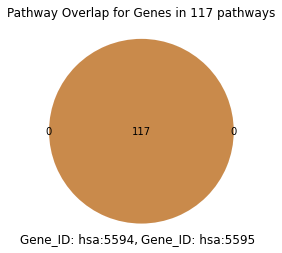

In [43]:
#below are the three individual Venn Diagrams to show there is no over-lap between the 
#genes that have the same number of pathways. 

#Genes that appear in 117 pathways, hsa:5594 & hsa:5595, are present in all the same pathways 

set1 = set(value_dictionary['hsa:5594'])
set2 = set(value_dictionary['hsa:5595'])
venn2([set1, set2], ("Gene_ID: hsa:5594, ", "Gene_ID: hsa:5595"), alpha = 0.7)
plt.title("Pathway Overlap for Genes in 117 pathways")
plt.show()

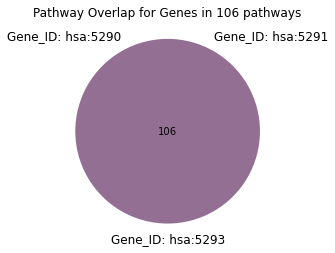

In [44]:
#below are the three individual Venn Diagrams to show there is no over-lap between the 
#genes that have the same number of pathways. 

#Genes that appear in 106 pathways, hsa:5290 & hsa:5293 & hsa: 5291, are present in all the same pathways 

set1 = set(value_dictionary['hsa:5290'])
set2 = set(value_dictionary['hsa:5293'])
set3 = set(value_dictionary['hsa:5291'])
venn3([set1, set2, set3], ("Gene_ID: hsa:5290","Gene_ID: hsa:5291", "Gene_ID: hsa:5293"), alpha = 0.7)
plt.title("Pathway Overlap for Genes in 106 pathways")
plt.show()

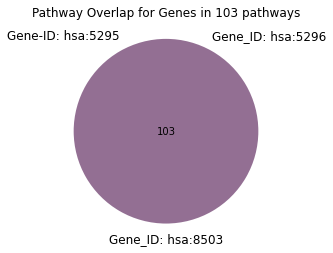

In [45]:
#below are the three individual Venn Diagrams to show there is no over-lap between the 
#genes that have the same number of pathways. 

#Genes that appear in 103 pathways, hsa:5290 & hsa:5293 & hsa: 5291, are present in all the same pathways 

set1 = set(value_dictionary['hsa:5295'])
set2 = set(value_dictionary['hsa:5296'])
set3 = set(value_dictionary['hsa:8503'])
venn3([set1, set2, set3], ("Gene-ID: hsa:5295", "Gene_ID: hsa:5296", "Gene_ID: hsa:8503"), alpha = 0.7)
plt.title("Pathway Overlap for Genes in 103 pathways")
plt.show()



There were mutiple genes tied for the top 3 genes that appear in the most pathways 

The above venn diagrams show that for the genes tied for each spot (1,2, and 3 respectively) <br>
,those genes are found in the same pathways. They overlap completely. 

we can then use any one of the genes at each spot (1, 2, and 3) as a representation of that spot since they are the same. 

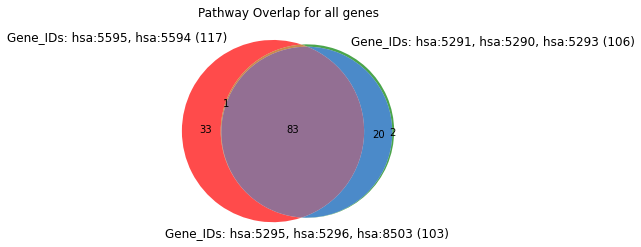

In [46]:
#below is the final Venn Diagram where I chose one gene from each pathway count category and placed it in this Venn Diagram.
#I did label each group though with all the names of the genes in that pathway count category. 

set1 = set(value_dictionary['hsa:5595'])
set2 = set(value_dictionary['hsa:5290'])
set3 = set(value_dictionary['hsa:5295'])
venn3([set1, set2, set3], ("Gene_IDs: hsa:5595, hsa:5594 (117)", "Gene_IDs: hsa:5291, hsa:5290, hsa:5293 (106)",
                           "Gene_IDs: hsa:5295, hsa:5296, hsa:8503 (103)"), alpha = 0.7)
plt.title("Pathway Overlap for all genes")
plt.show()

The top 3 genes that appear in the most number of KEGG pathways are 

- Gene_IDs: hsa:5595, hsa:5594, both appear in the same 117 pathways (#1) 
- Gene IDs: Gene_IDs: hsa:5291, hsa:5290, hsa:5293 all appear in the same 106 pathways (#2)
- Gene IDs: hsa:5295, hsa:5296, hsa:8503 all appear in the same 103 pathways (#3)

All of the top 3 genes appear in 84 common pathways 

gene #1 appears in 33 pathways uniquely from the other top 3, and appear in 1 common pathway with gene #3

Gene #2 appears in 2 pathways uniquely from the other top 3, and appears in 20 common pathways with gene #3, 


